#### STATISTICAL ANALYSIS WITH SCIPY AND STATSMODELS

In [1]:
import pandas as pd 
import numpy as np

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_style('darkgrid')
sns.set_palette('husl')

# libraries for stats analysis
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv("Student Mental health.csv")

In [3]:
# renaming the columns
data.rename(columns= {
    'Choose your gender':'gender', 'What is your course?':'course',
       'Your current year of Study':'study_year', 'What is your CGPA?':'cgpa',
       'Do you have Depression?':'depressed', 'Do you have Anxiety?':'anxiety',
       'Do you have Panic attack?':'panic_attack',
       'Did you seek any specialist for a treatment?':'sought_treatment'
}, inplace= True)

In [4]:
# define the regex pattern for extraction
pattern = r'(.*) - (.*)'

# we split cgpa into two new columns
data[['lower', 'upper']] = data['cgpa'].str.extract(pattern)
# change the data type to float
cols = ['lower', 'upper']
for col in cols:
    data[col] = data[col].apply(pd.to_numeric)

data['Cgpa'] = (data['lower'] + data['upper'])/2

data.drop(columns= ['cgpa', 'lower', 'upper'], inplace= True)

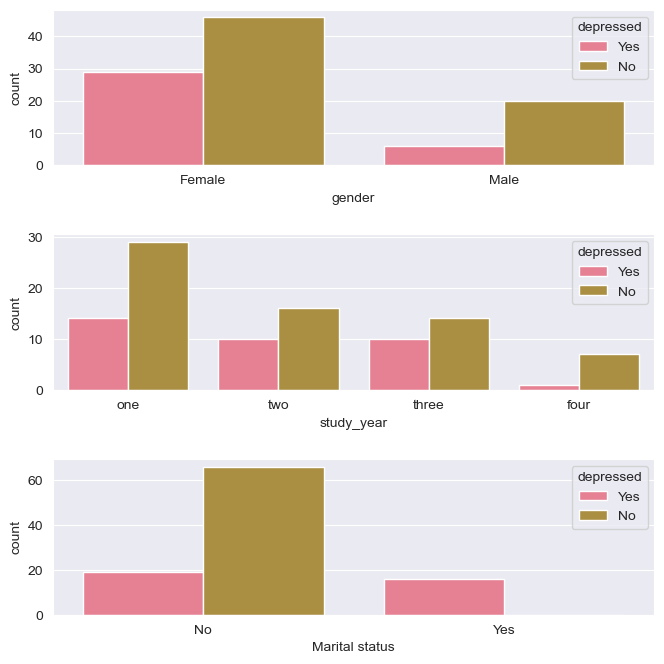

In [5]:
data['study_year'] = ['one' if x.lower() == 'year 1' else 'two' if x.lower() == 'year 2'
                      else 'three' if x.lower() == 'year 3'
                      else 'four' for x in data['study_year']]

# subplots of demographic variables 

fig, axes = plt.subplots(nrows=3, figsize = (7,7))
sns.countplot(data=data, x = 'gender',hue='depressed', ax = axes[0])
sns.countplot(data=data, x = 'study_year',hue='depressed', ax = axes[1])
sns.countplot(data=data, x = 'Marital status',hue='depressed', ax = axes[2])

fig.tight_layout(pad=2)

### Chi square

In [6]:
year_depressed = pd.crosstab(data['study_year'], data['depressed'])
year_depressed

depressed,No,Yes
study_year,,
four,7,1
one,29,14
three,14,10
two,16,10


In [10]:
chi_stats, pvalue, dof, expected = chi2_contingency(year_depressed)

In [11]:
print(pvalue)

0.4743929574625697


In [13]:
print(expected)

[[ 5.22772277  2.77227723]
 [28.0990099  14.9009901 ]
 [15.68316832  8.31683168]
 [16.99009901  9.00990099]]
